In [20]:
import numpy as np
from qiskit import IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import assemble
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [12]:
IBMQ.save_account('fdfb80d19410419eff8c7cbef32c13fba8d3ac8c39289eb504936d5bcf71307dd8ca5c7aa2f6790d054889f46d11d70ea2b4994a4d2a7003c8a4cd6f759bbb63', overwrite = True )
provider = IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-skku', group='skku', project='saint')

from qiskit.providers.ibmq import least_busy
large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print('the best backend is  : '+ backend.name())

ibmqfactory.load_account:WARNING:2021-07-01 16:24:34,542: Credentials are already in use. The existing account in the session will be replaced.


the best backend is  : ibmq_guadalupe


In [25]:
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.facecolor'] = 'w'

# generate $\chi_0, \chi_1$

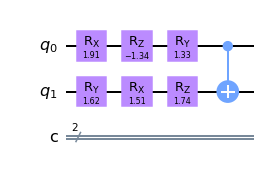

In [14]:
param_list = 2*pi*(np.random.random_sample(6)-0.5)

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(param_list[0] , qreg_q[0])
circuit.ry(param_list[1] , qreg_q[1])
circuit.rz(param_list[2] , qreg_q[0])
circuit.rx(param_list[3] , qreg_q[1])
circuit.ry(param_list[4] , qreg_q[0])
circuit.rz(param_list[5] , qreg_q[1])
circuit.cnot(qreg_q[0] , qreg_q[1])

circuit.draw('mpl')

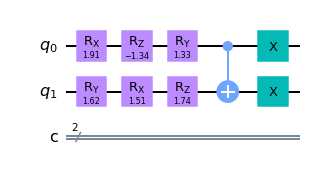

In [15]:
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])

circuit.draw('mpl')

chi0 chi1 내적

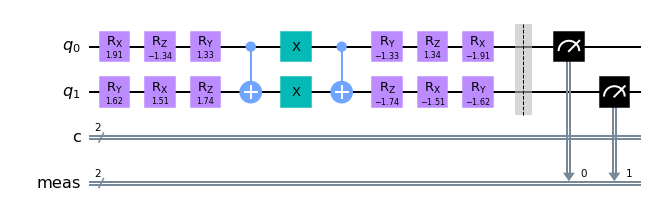

In [16]:
circuit.cnot(qreg_q[0] , qreg_q[1])
circuit.ry(-param_list[4] , qreg_q[0])
circuit.rz(-param_list[5] , qreg_q[1])
circuit.rz(-param_list[2] , qreg_q[0])
circuit.rx(-param_list[3] , qreg_q[1])
circuit.rx(-param_list[0] , qreg_q[0])
circuit.ry(-param_list[1] , qreg_q[1])

circuit.measure_all()

circuit.draw('mpl')

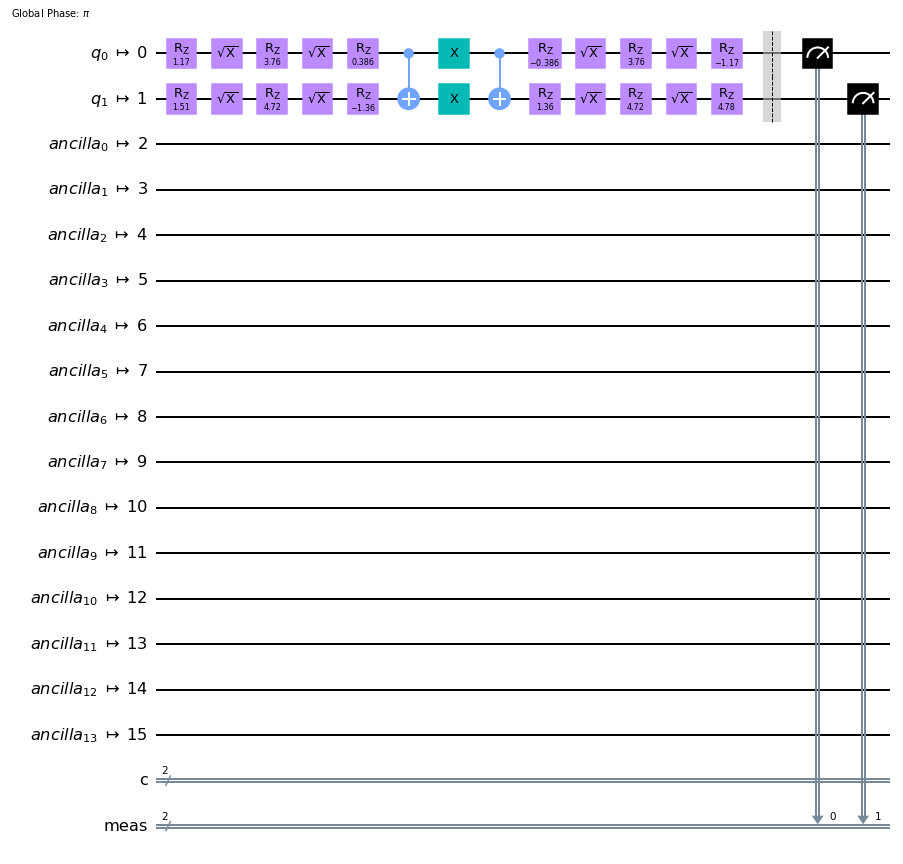

In [17]:
from qiskit import transpile
t_circ = transpile(circuit, backend)
t_circ.draw('mpl')

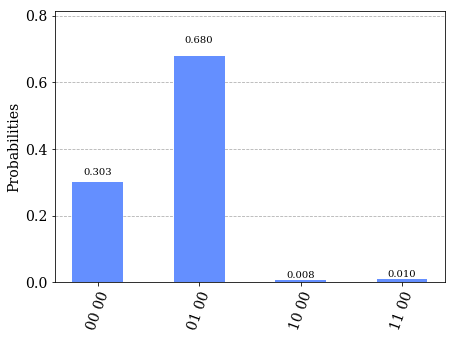

In [26]:
qobj = assemble(t_circ, shot = 8192)
counts = backend.run(qobj).result().get_counts()

plt.fgi
plot_histogram(counts)

<Figure size 432x288 with 0 Axes>

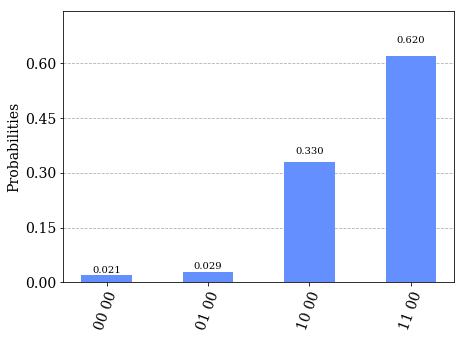

In [31]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(param_list[0] , qreg_q[0])
circuit.ry(param_list[1] , qreg_q[1])
circuit.rz(param_list[2] , qreg_q[0])
circuit.rx(param_list[3] , qreg_q[1])
circuit.ry(param_list[4] , qreg_q[0])
circuit.rz(param_list[5] , qreg_q[1])
circuit.cnot(qreg_q[0] , qreg_q[1])

circuit.y(qreg_q[0])
circuit.y(qreg_q[1])

circuit.cnot(qreg_q[0] , qreg_q[1])
circuit.ry(-param_list[4] , qreg_q[0])
circuit.rz(-param_list[5] , qreg_q[1])
circuit.rz(-param_list[2] , qreg_q[0])
circuit.rx(-param_list[3] , qreg_q[1])
circuit.rx(-param_list[0] , qreg_q[0])
circuit.ry(-param_list[1] , qreg_q[1])

circuit.measure_all()
t_circ = transpile(circuit, backend)

plt.figure()
circuit.draw('mpl')
plt.show()

qobj = assemble(t_circ, shot = 8192 )
counts = backend.run(qobj).result().get_counts()

# circuit.draw()
plot_histogram(counts)

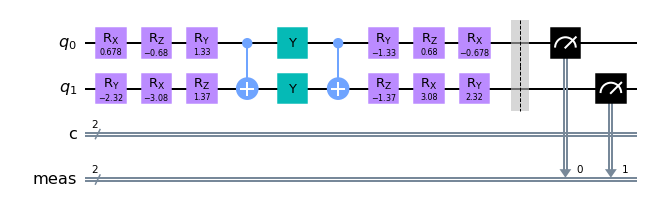

In [26]:
circuit.draw('mpl')

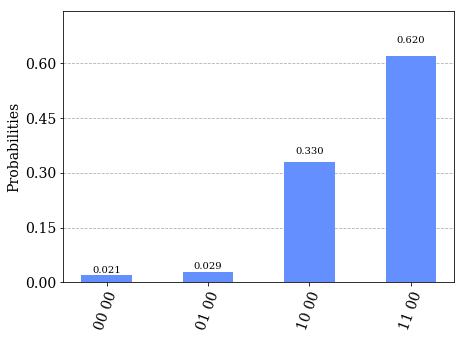

In [33]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(param_list[0] , qreg_q[0])
circuit.ry(param_list[1] , qreg_q[1])
circuit.rz(param_list[2] , qreg_q[0])
circuit.rx(param_list[3] , qreg_q[1])
circuit.ry(param_list[4] , qreg_q[0])
circuit.rz(param_list[5] , qreg_q[1])
circuit.cnot(qreg_q[0] , qreg_q[1])

circuit.z(qreg_q[0])
circuit.z(qreg_q[1])

circuit.cnot(qreg_q[0] , qreg_q[1])
circuit.ry(-param_list[4] , qreg_q[0])
circuit.rz(-param_list[5] , qreg_q[1])
circuit.rz(-param_list[2] , qreg_q[0])
circuit.rx(-param_list[3] , qreg_q[1])
circuit.rx(-param_list[0] , qreg_q[0])
circuit.ry(-param_list[1] , qreg_q[1])

circuit.measure_all()

t_circ = transpile(circuit, backend)

# qobj = assemble(t_circ, shot = 8192 )
# counts = backend.run(qobj).result().get_counts()


circuit.draw()
plot_histogram(counts)

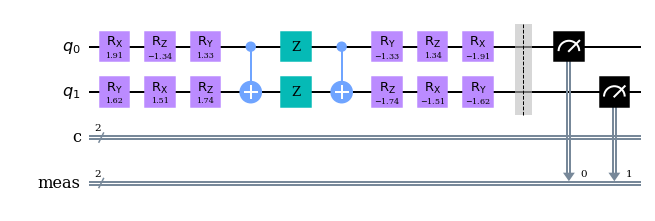

In [35]:
circuit.draw('mpl')

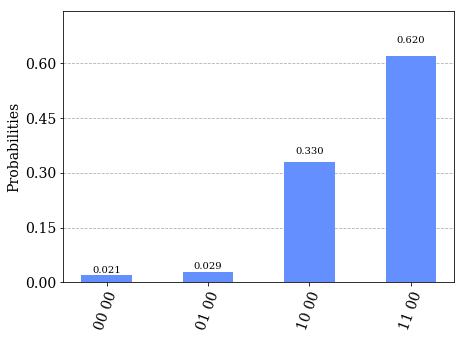

In [36]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(param_list[0] , qreg_q[0])
circuit.ry(param_list[1] , qreg_q[1])
circuit.rz(param_list[2] , qreg_q[0])
circuit.rx(param_list[3] , qreg_q[1])
circuit.ry(param_list[4] , qreg_q[0])
circuit.rz(param_list[5] , qreg_q[1])
circuit.cnot(qreg_q[0] , qreg_q[1])

circuit.x(qreg_q[0])
circuit.x(qreg_q[1])

circuit.y(qreg_q[0])
circuit.y(qreg_q[1])

circuit.cnot(qreg_q[0] , qreg_q[1])
circuit.ry(-param_list[4] , qreg_q[0])
circuit.rz(-param_list[5] , qreg_q[1])
circuit.rz(-param_list[2] , qreg_q[0])
circuit.rx(-param_list[3] , qreg_q[1])
circuit.rx(-param_list[0] , qreg_q[0])
circuit.ry(-param_list[1] , qreg_q[1])

circuit.measure_all()

# t_circ = transpile(circuit, backend)

# qobj = assemble(t_circ, shot = 8192 )
# counts = backend.run(qobj).result().get_counts()


circuit.draw()
plot_histogram(counts)

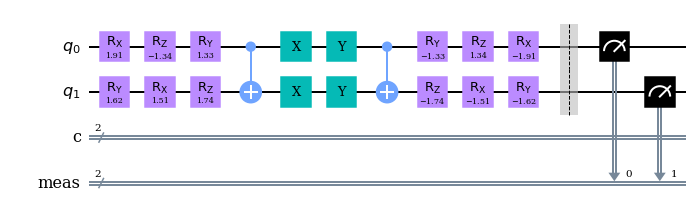

In [37]:
circuit.draw('mpl')

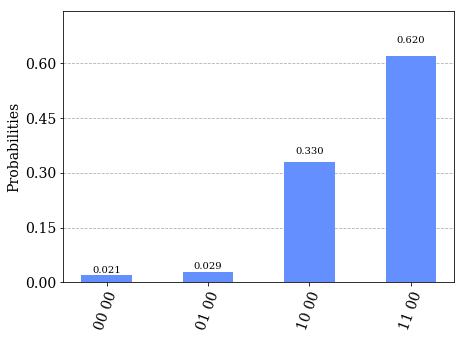

In [38]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(param_list[0] , qreg_q[0])
circuit.ry(param_list[1] , qreg_q[1])
circuit.rz(param_list[2] , qreg_q[0])
circuit.rx(param_list[3] , qreg_q[1])
circuit.ry(param_list[4] , qreg_q[0])
circuit.rz(param_list[5] , qreg_q[1])
circuit.cnot(qreg_q[0] , qreg_q[1])

circuit.x(qreg_q[0])
circuit.x(qreg_q[1])

circuit.z(qreg_q[0])
circuit.z(qreg_q[1])

circuit.cnot(qreg_q[0] , qreg_q[1])
circuit.ry(-param_list[4] , qreg_q[0])
circuit.rz(-param_list[5] , qreg_q[1])
circuit.rz(-param_list[2] , qreg_q[0])
circuit.rx(-param_list[3] , qreg_q[1])
circuit.rx(-param_list[0] , qreg_q[0])
circuit.ry(-param_list[1] , qreg_q[1])

circuit.measure_all()

t_circ = transpile(circuit, backend)

# qobj = assemble(t_circ, shot = 8192 )
# counts = backend.run(qobj).result().get_counts()


circuit.draw()
plot_histogram(counts)

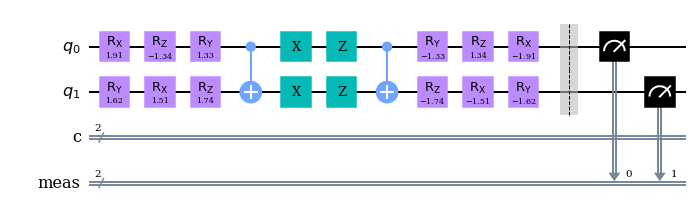

In [39]:
circuit.draw('mpl')

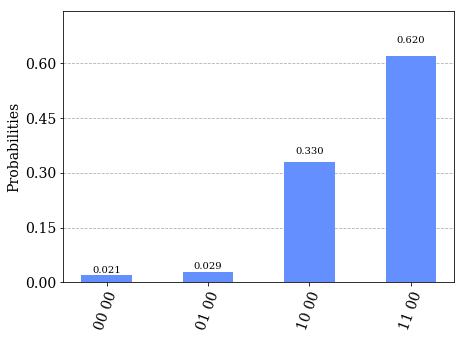

In [40]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(param_list[0] , qreg_q[0])
circuit.ry(param_list[1] , qreg_q[1])
circuit.rz(param_list[2] , qreg_q[0])
circuit.rx(param_list[3] , qreg_q[1])
circuit.ry(param_list[4] , qreg_q[0])
circuit.rz(param_list[5] , qreg_q[1])
circuit.cnot(qreg_q[0] , qreg_q[1])

circuit.y(qreg_q[0])
circuit.y(qreg_q[1])

circuit.z(qreg_q[0])
circuit.z(qreg_q[1])

circuit.cnot(qreg_q[0] , qreg_q[1])
circuit.ry(-param_list[4] , qreg_q[0])
circuit.rz(-param_list[5] , qreg_q[1])
circuit.rz(-param_list[2] , qreg_q[0])
circuit.rx(-param_list[3] , qreg_q[1])
circuit.rx(-param_list[0] , qreg_q[0])
circuit.ry(-param_list[1] , qreg_q[1])

circuit.measure_all()

t_circ = transpile(circuit, backend)

# qobj = assemble(t_circ, shot = 8192 )
# counts = backend.run(qobj).result().get_counts()


circuit.draw()
plot_histogram(counts)

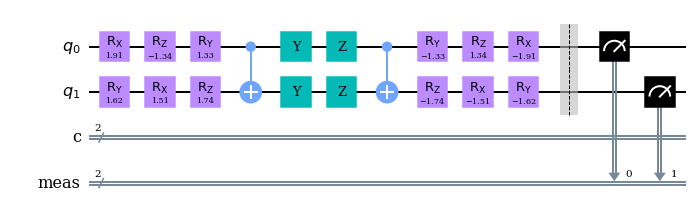

In [41]:
circuit.draw('mpl')

In [32]:
Emat = np.array([[1, 0.460, 0.270, 0.501],[0.460, 1, 0.494, 0.287],[0.270, 0.494, 1, 0.496],[0.501, 0.287, 0.496, 1]])

Emat = np.sqrt(Emat)

In [33]:
Emat

array([[1.        , 0.678233  , 0.51961524, 0.70781353],
       [0.678233  , 1.        , 0.70285134, 0.53572381],
       [0.51961524, 0.70285134, 1.        , 0.70427267],
       [0.70781353, 0.53572381, 0.70427267, 1.        ]])

In [ ]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(param_list[0] , qreg_q[0])
circuit.ry(param_list[1] , qreg_q[1])
circuit.rz(param_list[2] , qreg_q[0])
circuit.rx(param_list[3] , qreg_q[1])
circuit.ry(param_list[4] , qreg_q[0])
circuit.rz(param_list[5] , qreg_q[1])
circuit.cnot(qreg_q[0] , qreg_q[1])

circuit.z(qreg_q[0])
circuit.z(qreg_q[1])

circuit.cnot(qreg_q[0] , qreg_q[1])
circuit.ry(-param_list[4] , qreg_q[0])
circuit.rz(-param_list[5] , qreg_q[1])
circuit.rz(-param_list[2] , qreg_q[0])
circuit.rx(-param_list[3] , qreg_q[1])
circuit.rx(-param_list[0] , qreg_q[0])
circuit.ry(-param_list[1] , qreg_q[1])

circuit.measure_all()

t_circ = transpile(circuit, backend)

qobj = assemble(t_circ, shot = 8192 )
counts = backend.run(qobj).result().get_counts()


circuit.draw()
plot_histogram(counts)

In [ ]:
new_count = []
print(counts)
# for val in counts.values:
#   print(val)
#   new_count.append(val)



# print()
# for i in range()
print(new_count)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  """


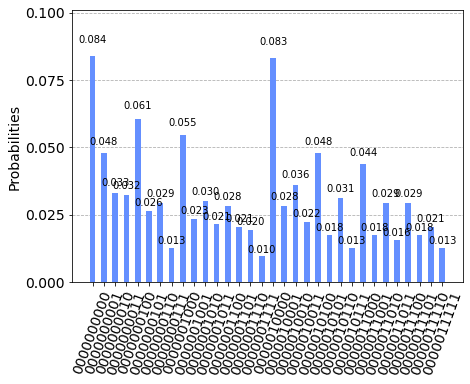

In [ ]:
from qiskit import assemble
from qiskit.visualization import plot_histogram

qobj = assemble(t_circ, shot = 8192 )
counts = backend.run(qobj).result().get_counts()

plot_histogram(counts)

In [ ]:
print(counts)

{'0000000000': 86, '0000000001': 49, '0000010000': 85, '0000010001': 29, '0000010010': 37, '0000010011': 23, '0000010100': 49, '0000010101': 18, '0000010110': 32, '0000010111': 13, '0000011000': 45, '0000011001': 18, '0000011010': 30, '0000011011': 16, '0000011100': 30, '0000011101': 18, '0000011110': 21, '0000011111': 13, '0000000010': 34, '0000000011': 33, '0000000100': 62, '0000000101': 27, '0000000110': 30, '0000000111': 13, '0000001000': 56, '0000001001': 24, '0000001010': 31, '0000001011': 22, '0000001100': 29, '0000001101': 21, '0000001110': 20, '0000001111': 10}


In [ ]:
np.array([[1,2],[1,2]])

array([[1, 2],
       [1, 2]])

In [ ]:
Emat = np.array([[counts['0000001000'],counts['0000001010'],counts['0000000010'],counts['0000000000']],
                 [counts['0000001001'],counts['0000001011'],counts['0000000011'],counts['0000000001']],
                 [counts['0000001101'],counts['0000001111'],counts['0000000111'],counts['0000000101']],
                 [counts['0000001100'],counts['0000001110'],counts['0000000110'],counts['0000000100']
                 ]])

In [ ]:
len(Emat)

4

In [ ]:
Emat = np.sqrt((Emat*32-1)/8192)

In [ ]:
Emat

array([[0.46757666, 0.34780983, 0.36426698, 0.57949584],
       [0.30598681, 0.29294271, 0.35886513, 0.43736047],
       [0.2861978 , 0.1973333 , 0.22507594, 0.32457153],
       [0.33639141, 0.27929005, 0.34214826, 0.49200145]])

In [ ]:
Emat_01 = np.array([[counts['0000011000'],counts['0000011010'],counts['0000010010'],counts['0000010000']],
                 [counts['0000011001'],counts['0000011011'],counts['0000010011'],counts['0000010001']],
                 [counts['0000011101'],counts['0000011111'],counts['0000010111'],counts['0000010101']],
                 [counts['0000011100'],counts['0000011110'],counts['0000010110'],counts['0000010100']
                 ]])

In [ ]:
Emat_01

array([[48, 21, 51, 53],
       [36, 24, 51, 70],
       [13, 10, 15, 28],
       [23, 13, 25, 33]])

In [ ]:
Emat_01 = np.sqrt((1-Emat_01*32)/8192*(-1))

In [ ]:
Emat_01 - Emat

array([[ 0.01844087, -0.02610683, -0.02553278, -0.05275947],
       [ 0.01057023,  0.02669677,  0.02708537,  0.04693821],
       [-0.0323812 , -0.05242244, -0.02312558,  0.01203717],
       [ 0.04978003,  0.03790175, -0.01226691,  0.00548441]])

In [ ]:
np.linalg.eigvals(Emat_01 - Emat)

array([ 0.03162592+0.04032813j,  0.03162592-0.04032813j,
       -0.01787769+0.02736177j, -0.01787769-0.02736177j])

In [ ]:
Emat

array([[0.41443085, 0.31230463, 0.47173529, 0.50763218],
       [0.36426698, 0.27929005, 0.41911714, 0.47585757],
       [0.25745714, 0.24975574, 0.26493476, 0.31849714],
       [0.24975574, 0.1871742 , 0.32457153, 0.35338071]])

In [ ]:

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')

psi0 = QuantumCircuit(qreg_q, creg_c)


psi0.rx(param_list[0] , qreg_q[0])
psi0.ry(param_list[1] , qreg_q[1])
psi0.rz(param_list[2] , qreg_q[0])
psi0.rx(param_list[3] , qreg_q[1])
psi0.ry(param_list[4] , qreg_q[0])
psi0.rz(param_list[5] , qreg_q[1])
psi0.cnot(qreg_q[0] , qreg_q[1])

psi0.draw('mpl')

psi1 = QuantumCircuit(qreg_q, creg_c)


psi1.rx(param_list[0] , qreg_q[0])
psi1.ry(param_list[1] , qreg_q[1])
psi1.rz(param_list[2] , qreg_q[0])
psi1.rx(param_list[3] , qreg_q[1])
psi1.ry(param_list[4] , qreg_q[0])
psi1.rz(param_list[5] , qreg_q[1])
psi1.cnot(qreg_q[0] , qreg_q[1])

psi1.draw('mpl')
psi2 = QuantumCircuit(qreg_q, creg_c)


psi2.rx(param_list[0] , qreg_q[0])
psi2.ry(param_list[1] , qreg_q[1])
psi2.rz(param_list[2] , qreg_q[0])
psi2.rx(param_list[3] , qreg_q[1])
psi2.ry(param_list[4] , qreg_q[0])
psi2.rz(param_list[5] , qreg_q[1])
psi2.cnot(qreg_q[0] , qreg_q[1])

psi2.draw('mpl')
psi3 = QuantumCircuit(qreg_q, creg_c)


psi3.rx(param_list[0] , qreg_q[0])
psi3.ry(param_list[1] , qreg_q[1])
psi3.rz(param_list[2] , qreg_q[0])
psi3.rx(param_list[3] , qreg_q[1])
psi3.ry(param_list[4] , qreg_q[0])
psi3.rz(param_list[5] , qreg_q[1])
psi3.cnot(qreg_q[0] , qreg_q[1])

psi3.draw('mpl')


chi0 = psi0
chi0.measure_all()

chi0.draw('mpl')


chi1 = psi1

chi1.x(qreg_q[0])
chi1.x(qreg_q[1])
chi1.measure_all()

chi1.draw('mpl')




In [ ]:
keys = []

for i in range(32):

  val = i
  key = ''
  for j in np.arange(9,0,-1):
    k = int(val/2**j)
    val = val - k*2**j
    key = '%s%d'%(key,k)
  key = key + str(val)

  keys.append(key)

In [ ]:
vals = [counts[k] for k in keys]
print(vals)

[43, 28, 27, 30, 39, 38, 33, 18, 29, 23, 24, 21, 27, 21, 20, 15, 64, 47, 51, 31, 47, 31, 44, 34, 35, 35, 28, 24, 32, 32, 27, 26]


In [ ]:

counts.keys()

dict_keys(['0000000000', '0000000001', '0000010000', '0000010001', '0000010010', '0000010011', '0000010100', '0000010101', '0000010110', '0000010111', '0000011000', '0000011001', '0000011010', '0000011011', '0000011100', '0000011101', '0000011110', '0000011111', '0000000010', '0000000011', '0000000100', '0000000101', '0000000110', '0000000111', '0000001000', '0000001001', '0000001010', '0000001011', '0000001100', '0000001101', '0000001110', '0000001111'])

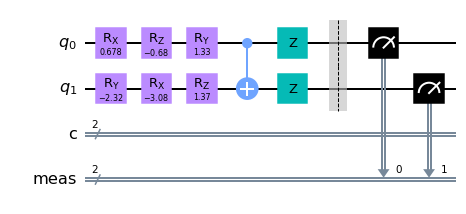

In [61]:

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')

psi0 = QuantumCircuit(qreg_q, creg_c)


psi0.rx(param_list[0] , qreg_q[0])
psi0.ry(param_list[1] , qreg_q[1])
psi0.rz(param_list[2] , qreg_q[0])
psi0.rx(param_list[3] , qreg_q[1])
psi0.ry(param_list[4] , qreg_q[0])
psi0.rz(param_list[5] , qreg_q[1])
psi0.cnot(qreg_q[0] , qreg_q[1])

psi0.draw('mpl')

psi1 = QuantumCircuit(qreg_q, creg_c)


psi1.rx(param_list[0] , qreg_q[0])
psi1.ry(param_list[1] , qreg_q[1])
psi1.rz(param_list[2] , qreg_q[0])
psi1.rx(param_list[3] , qreg_q[1])
psi1.ry(param_list[4] , qreg_q[0])
psi1.rz(param_list[5] , qreg_q[1])
psi1.cnot(qreg_q[0] , qreg_q[1])

psi1.draw('mpl')
psi2 = QuantumCircuit(qreg_q, creg_c)


psi2.rx(param_list[0] , qreg_q[0])
psi2.ry(param_list[1] , qreg_q[1])
psi2.rz(param_list[2] , qreg_q[0])
psi2.rx(param_list[3] , qreg_q[1])
psi2.ry(param_list[4] , qreg_q[0])
psi2.rz(param_list[5] , qreg_q[1])
psi2.cnot(qreg_q[0] , qreg_q[1])

psi2.draw('mpl')
psi3 = QuantumCircuit(qreg_q, creg_c)


psi3.rx(param_list[0] , qreg_q[0])
psi3.ry(param_list[1] , qreg_q[1])
psi3.rz(param_list[2] , qreg_q[0])
psi3.rx(param_list[3] , qreg_q[1])
psi3.ry(param_list[4] , qreg_q[0])
psi3.rz(param_list[5] , qreg_q[1])
psi3.cnot(qreg_q[0] , qreg_q[1])

psi3.draw('mpl')


chi2 = psi2
chi2.y(qreg_q[0])
chi2.y(qreg_q[1])
chi2.measure_all()
chi2.draw('mpl')


chi3 = psi3
chi3.z(qreg_q[0])
chi3.z(qreg_q[1])
chi3.measure_all()
chi3.draw('mpl')




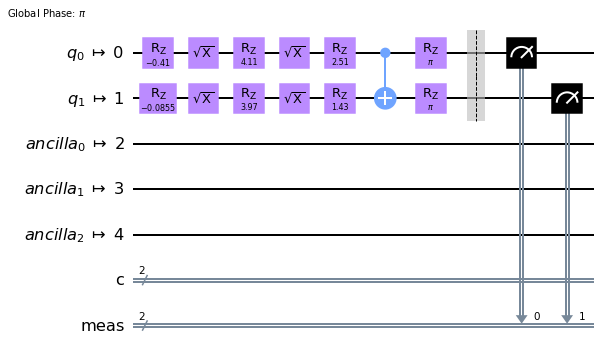

In [62]:

t_circ0 = transpile(chi0, backend)
t_circ0.draw('mpl')
t_circ1 = transpile(chi1, backend)
t_circ1.draw('mpl')
t_circ2 = transpile(chi2, backend)
t_circ2.draw('mpl')
t_circ3 = transpile(chi3, backend)
t_circ3.draw('mpl')


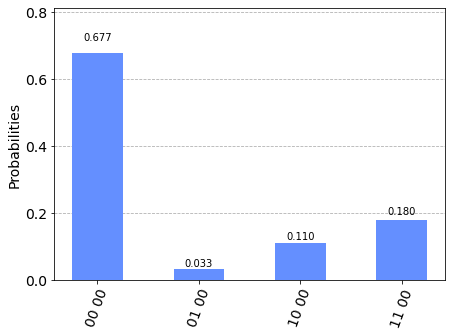

In [63]:
from qiskit import assemble
from qiskit.visualization import plot_histogram

chi0qobj = assemble(t_circ0, shot = 1000 )
chi0counts = backend.run(chi0qobj).result().get_counts()

plot_histogram(chi0counts)




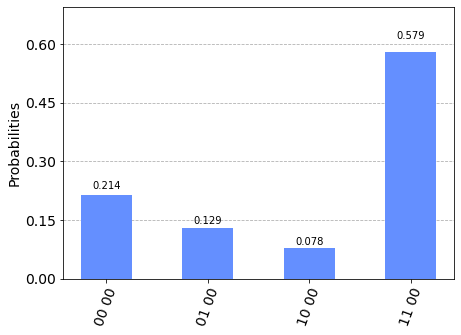

In [64]:
chi1qobj = assemble(t_circ1, shot = 1000 )
chi1counts = backend.run(chi1qobj).result().get_counts()

plot_histogram(chi1counts)



In [65]:
t_circ2.draw()

┌──────────────┐┌────┐┌────────────┐┌────┐┌────────────┐     »
      q_0 -> 0 ─┤ RZ(-0.40984) ├┤ √X ├┤ RZ(4.1098) ├┤ √X ├┤ RZ(2.5085) ├──■──»
               ┌┴──────────────┤├────┤├────────────┤├────┤├────────────┤┌─┴─┐»
      q_1 -> 1 ┤ RZ(-0.085466) ├┤ √X ├┤ RZ(3.9681) ├┤ √X ├┤ RZ(1.4324) ├┤ X ├»
               └───────────────┘└────┘└────────────┘└────┘└────────────┘└───┘»
ancilla_0 -> 2 ──────────────────────────────────────────────────────────────»
                                                                             »
ancilla_1 -> 3 ──────────────────────────────────────────────────────────────»
                                                                             »
ancilla_2 -> 4 ──────────────────────────────────────────────────────────────»
                                                                             »
          c: 2/══════════════════════════════════════════════════════════════»
                                                                             »
       meas: 2/══════════════════════════════════════════════════════════════»
                                                                             »
«               ┌────┐┌────┐┌───────┐ ░ ┌─┐   
«      q_0 -> 0 ┤ √X ├┤ √X ├┤ RZ(π) ├─░─┤M├───
«               ├────┤├────┤├───────┤ ░ └╥┘┌─┐
«      q_1 -> 1 ┤ √X ├┤ √X ├┤ RZ(π) ├─░──╫─┤M├
«               └────┘└────┘└───────┘ ░  ║ └╥┘
«ancilla_0 -> 2 ─────────────────────────╫──╫─
«                                        ║  ║ 
«ancilla_1 -> 3 ─────────────────────────╫──╫─
«                                        ║  ║ 
«ancilla_2 -> 4 ─────────────────────────╫──╫─
«                                        ║  ║ 
«          c: 2/═════════════════════════╬══╬═
«                                        ║  ║ 
«       meas: 2/═════════════════════════╩══╩═
«                                        0  1

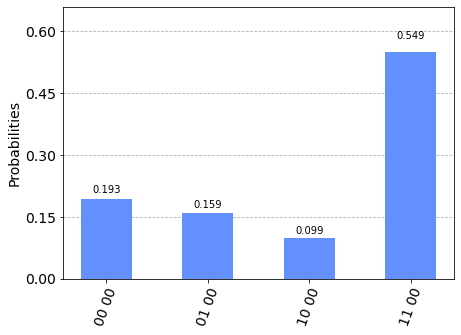

In [66]:
chi2qobj = assemble(t_circ2, shot = 1000 )
chi2counts = backend.run(chi2qobj).result().get_counts()

plot_histogram(chi2counts)



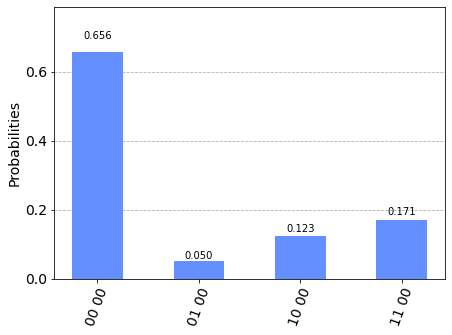

In [67]:
chi3qobj = assemble(t_circ3, shot = 1000 )
chi3counts = backend.run(chi3qobj).result().get_counts()

plot_histogram(chi3counts)

In [68]:
chi0counts_list = []
print(chi0counts)
for key in chi0counts:
  # print(chi0counts[key])
  chi0counts_list.append(chi0counts[key])

print(chi0counts_list)

{'00 00': 693, '01 00': 34, '10 00': 113, '11 00': 184}
[693, 34, 113, 184]


In [69]:
chi1counts_list = []
print(chi1counts)
for key in chi1counts:
  # print(chi0counts[key])
  chi1counts_list.append(chi1counts[key])

print(chi1counts_list)

{'00 00': 219, '01 00': 132, '10 00': 80, '11 00': 593}
[219, 132, 80, 593]


In [70]:
chi2counts_list = []
print(chi2counts)
for key in chi2counts:
  # print(chi2counts[key])
  chi2counts_list.append(chi2counts[key])

print(chi2counts_list)

{'00 00': 198, '01 00': 163, '10 00': 101, '11 00': 562}
[198, 163, 101, 562]


In [71]:
chi3counts_list = []
print(chi3counts)
for key in chi3counts:
  # print(chi0counts[key])
  chi3counts_list.append(chi3counts[key])

print(chi3counts_list)

{'00 00': 672, '01 00': 51, '10 00': 126, '11 00': 175}
[672, 51, 126, 175]


In [84]:

M = []
M.append(chi0counts_list)
M.append(chi1counts_list)
M.append(chi2counts_list)
M.append(chi3counts_list)


In [85]:
print(M)

[[693, 34, 113, 184], [219, 132, 80, 593], [198, 163, 101, 562], [672, 51, 126, 175]]


In [86]:
M = np.transpose(M)

In [87]:
print(M)

[[693 219 198 672]
 [ 34 132 163  51]
 [113  80 101 126]
 [184 593 562 175]]


In [88]:
M =  M/1024
M = np.sqrt(M)

In [89]:
print(M)

[[0.82265291 0.46245777 0.43972648 0.81009259]
 [0.18221725 0.35903517 0.39897329 0.22316964]
 [0.33219206 0.2795085  0.31405861 0.35078038]
 [0.42389562 0.76098723 0.74082935 0.41339864]]


In [ ]:
print(M[1,0])

0.6179287479151622


In [90]:
D = np.zeros([4,4])
for n in range(4):
  for m in range(4):
    # print(D[n,m])
    D[n,m] = (1/2)*(2*M[1,n]*M[2,m]+2*M[2,n]*M[1,m]+M[0,n]*M[0,m]-M[1,n]*M[1,m]-M[2,n]*M[2,m]+M[3,n]*M[3,m])


print(D)

[[0.47750756 0.44257414 0.43913715 0.48028896]
 [0.44257414 0.49367551 0.49231906 0.44384673]
 [0.43913715 0.49231906 0.4927895  0.44167669]
 [0.48028896 0.44384673 0.44167669 0.4837155 ]]


In [91]:
print(Emat)

[[1.         0.678233   0.51961524 0.70781353]
 [0.678233   1.         0.70285134 0.53572381]
 [0.51961524 0.70285134 1.         0.70427267]
 [0.70781353 0.53572381 0.70427267 1.        ]]


In [168]:
E = Emat

In [304]:
import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np

In [305]:
delt = 0.1
epochs = 1000
E = tf.cast(E,tf.complex64)
D = tf.cast(D,tf.complex64)
G = E-delt*1j*D

In [306]:

alpha_r = np.random.rand(1,4)
alpha_i = np.random.rand(1,4)
alpha_r = np.array([0.5,0.5,0.5,0.5])
alpha_i = np.zeros_like(alpha_i)
alpha = tf.complex(alpha_r,alpha_i)
alpha = tf.cast(alpha,tf.complex64)


dagger_alpha = tf.math.conj(alpha)

print(tf.matmul(dagger_alpha,tf.matmul(E,tf.transpose(alpha))))\

# print(dagger_alpha+alpha)

tf.Tensor([[2.9242547+0.j]], shape=(1, 1), dtype=complex64)


In [307]:
##Optimizer part
random_input = tf.keras.layers.Input(shape=(50))
x = tf.keras.layers.Dense(20, activation=tf.tanh, name="Dense1")(random_input)
x = tf.keras.layers.Dense(8, activation=tf.tanh, name="Dense2")(x)
new_alpha_r = x[:,:4]
new_alpha_i = x[:,4:]

new_alpha = tf.complex(new_alpha_r, new_alpha_i)
new_dagger_alpha = tf.math.conj(new_alpha)

constraint = tf.matmul(new_dagger_alpha,tf.matmul(tf.cast(E,tf.complex64),tf.transpose(new_alpha)))
# new_normed_alpha = new_alpha/(new_norm)
# new_normed_dagger_alpha = new_dagger_alpha

F = tf.matmul(new_dagger_alpha,tf.matmul(G,tf.matmul(tf.transpose(alpha),tf.matmul(dagger_alpha,tf.matmul(tf.transpose(tf.math.conj(G)),tf.transpose(new_alpha))))))/tf.matmul(dagger_alpha,tf.matmul(E,tf.transpose(alpha)))
F_R = tf.matmul(tf.math.conj(F), tf.transpose(F))
loss = K.mean(tf.square(tf.square(1-F))+1*tf.square(1-constraint))



optimazer = tf.keras.models.Model(random_input, new_alpha, name='optimazed')
optimazer.add_loss(loss)
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
optimazer.compile(optimizer=opt)

In [308]:
inputtest = np.random.rand(1,50)
print(inputtest)
train = np.ones_like(inputtest)
# train = inputtest


history = optimazer.fit(train, epochs=epochs, batch_size=50)

[[0.59163965 0.63327292 0.90885305 0.85150709 0.42018195 0.13507649
  0.97635874 0.65795959 0.93890425 0.74405138 0.5527735  0.45615241
  0.50480319 0.74691123 0.10917701 0.64934281 0.95297426 0.83423879
  0.39605415 0.07435582 0.65424221 0.26252132 0.48287897 0.94598578
  0.22029019 0.62095676 0.38281397 0.52094744 0.15097008 0.90065233
  0.44793704 0.34936788 0.00627976 0.29538966 0.91916171 0.50019128
  0.29332634 0.19373921 0.48756114 0.76979981 0.37692019 0.63322979
  0.39302039 0.06484499 0.81757997 0.72413793 0.0698997  0.39906862
  0.46664652 0.93913924]]
Epoch 1/1000
1/1 [==============================] - 0s 488ms/step - loss: 0.2234
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 347.6415
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.5948
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1989
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 10.7697
Epoch 6/1000
1/1 [===========

In [309]:
# zexp = 0

# for n in range(4):
#    for m in range(4):
#      zexp+=np.conjugate(alpha[0,n])*alpha[0,m]*np.conjugate(np.transpose(M))[0,n]*M[0,m]+np.conjugate(alpha[0,n])*alpha[0,m]*np.conjugate(np.transpose(M))[1,n]*M[1,m]-np.conjugate(alpha[0,n])*alpha[0,m]*np.conjugate(np.transpose(M))[2,n]*M[2,m]-np.conjugate(alpha[0,n])*alpha[0,m]*np.conjugate(np.transpose(M))[3,n]*M[3,m]

In [310]:
alpha = optimazer(train)
# test = tf.matmul(tf.math.conj(sample),tf.matmul(E,tf.transpose(sample)))
# print(test)
print(alpha.shape)
chi0_vector = np.zeros([1,4])
chi0_vector[0,0] = np.sqrt(chi0counts_list[0]/1024)+np.sqrt(chi0counts_list[1]/1024)
chi0_vector[0,1] = np.sqrt(chi0counts_list[2]/1024)+np.sqrt(chi0counts_list[3]/1024)
chi0_vector[0,2] = np.sqrt(chi0counts_list[2]/1024)+np.sqrt(chi0counts_list[0]/1024)
chi0_vector[0,3] = np.sqrt(chi0counts_list[1]/1024)+np.sqrt(chi0counts_list[3]/1024)
print(chi0_vector)

chi1_vector = np.zeros([1,4])
chi1_vector[0,0] = np.sqrt(chi1counts_list[0]/1024)+np.sqrt(chi1counts_list[1]/1024)
chi1_vector[0,1] = np.sqrt(chi1counts_list[2]/1024)+np.sqrt(chi1counts_list[3]/1024)
chi1_vector[0,2] = np.sqrt(chi1counts_list[2]/1024)+np.sqrt(chi1counts_list[0]/1024)
chi1_vector[0,3] = np.sqrt(chi1counts_list[1]/1024)+np.sqrt(chi1counts_list[3]/1024)
print(chi1_vector)

chi2_vector = np.zeros([1,4])
chi2_vector[0,0] = np.sqrt(chi2counts_list[0]/1024)+np.sqrt(chi2counts_list[1]/1024)
chi2_vector[0,1] = np.sqrt(chi2counts_list[2]/1024)+np.sqrt(chi2counts_list[3]/1024)
chi2_vector[0,2] = np.sqrt(chi2counts_list[2]/1024)+np.sqrt(chi2counts_list[0]/1024)
chi2_vector[0,3] = np.sqrt(chi2counts_list[1]/1024)+np.sqrt(chi2counts_list[3]/1024)
print(chi2_vector)

chi3_vector = np.zeros([1,4])
chi3_vector[0,0] = np.sqrt(chi3counts_list[0]/1024)+np.sqrt(chi3counts_list[1]/1024)
chi3_vector[0,1] = np.sqrt(chi3counts_list[2]/1024)+np.sqrt(chi3counts_list[3]/1024)
chi3_vector[0,2] = np.sqrt(chi3counts_list[2]/1024)+np.sqrt(chi3counts_list[0]/1024)
chi3_vector[0,3] = np.sqrt(chi3counts_list[1]/1024)+np.sqrt(chi3counts_list[3]/1024)
print(chi3_vector)

psi_new = alpha[0,0]*chi0_vector + alpha[0,1]*chi1_vector + alpha[0,2]*chi2_vector+ alpha[0,3]*chi3_vector

ztensor = np.zeros([4,4])
ztensor[0,0] = 1
ztensor[1,1] = 1
ztensor[2,2] = -1
ztensor[3,3] = -1

zexp = np.matmul(np.conjugate(psi_new),np.matmul(ztensor, np.transpose(psi_new)))
print(zexp)

(1, 4)
[[1.00487016 0.75608768 1.15484497 0.60611287]]
[[0.82149293 1.04049573 0.74196627 1.12002239]]
[[0.83869977 1.05488796 0.75378509 1.13980264]]
[[1.03326223 0.76417902 1.16087297 0.63656828]]
[[-0.02171539+0.j]]


In [311]:
# zexp = 0

# for n in range(4):
#    for m in range(4):
#      zexp+=np.conjugate(alpha[0,n])*alpha[0,m]*np.conjugate(np.transpose(M))[0,n]*M[0,m]+np.conjugate(alpha[0,n])*alpha[0,m]*np.conjugate(np.transpose(M))[1,n]*M[1,m]-np.conjugate(alpha[0,n])*alpha[0,m]*np.conjugate(np.transpose(M))[2,n]*M[2,m]-np.conjugate(alpha[0,n])*alpha[0,m]*np.conjugate(np.transpose(M))[3,n]*M[3,m]

In [312]:
print(zexp)
zexps = []
zexps.append(zexp)

[[-0.02171539+0.j]]


In [313]:
dagger_alpha = tf.math.conj(alpha)

random_input = tf.keras.layers.Input(shape=(50))
x = tf.keras.layers.Dense(20, activation=tf.tanh, name="Dense1")(random_input)
x = tf.keras.layers.Dense(8, activation=tf.tanh, name="Dense2")(x)
new_alpha_r = x[:,:4]
new_alpha_i = x[:,4:]

new_alpha = tf.complex(new_alpha_r, new_alpha_i)
new_dagger_alpha = tf.math.conj(new_alpha)

constraint = tf.matmul(new_dagger_alpha,tf.matmul(tf.cast(E,tf.complex64),tf.transpose(new_alpha)))
# new_normed_alpha = new_alpha/(new_norm)
# new_normed_dagger_alpha = new_dagger_alpha

F = tf.matmul(new_dagger_alpha,tf.matmul(G,tf.matmul(tf.transpose(alpha),tf.matmul(dagger_alpha,tf.matmul(tf.transpose(tf.math.conj(G)),tf.transpose(new_alpha))))))/tf.matmul(dagger_alpha,tf.matmul(E,tf.transpose(alpha)))
F_R = tf.matmul(tf.math.conj(F), tf.transpose(F))
loss = K.mean(tf.square(tf.square(1-F))+1*tf.square(1-constraint))



optimazer = tf.keras.models.Model(random_input, new_alpha, name='optimazed')
optimazer.add_loss(loss)
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
optimazer.compile(optimizer=opt)

inputtest = np.random.rand(1,50)
print(inputtest)
train = np.ones_like(inputtest)
# train = inputtest


history = optimazer.fit(train, epochs=epochs, batch_size=50)

[[0.77908955 0.54708832 0.43340753 0.88486195 0.56154185 0.98340076
  0.17374762 0.9955691  0.11578477 0.3175596  0.87662813 0.63551872
  0.03384264 0.08000849 0.07507971 0.62083238 0.23099726 0.14844329
  0.4833272  0.54841142 0.14902258 0.12107076 0.81582646 0.64660247
  0.01916127 0.1216012  0.61014705 0.56202655 0.71690544 0.76556947
  0.24934092 0.17360405 0.12225482 0.71384534 0.55928985 0.07138256
  0.81829887 0.38892569 0.37997163 0.00208126 0.73025755 0.06325629
  0.53742355 0.01456178 0.31716535 0.37309193 0.53386312 0.03550218
  0.24599156 0.91533508]]
Epoch 1/1000
1/1 [==============================] - 1s 509ms/step - loss: 15.4613
Epoch 2/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.8843
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 4.6881
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 9.9353
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 6.6944
Epoch 6/1000
1/1 [============

In [314]:

alpha = optimazer(train)

psi_new = alpha[0,0]*chi0_vector + alpha[0,1]*chi1_vector + alpha[0,2]*chi2_vector+ alpha[0,3]*chi3_vector

zexp = np.matmul(np.conjugate(psi_new),np.matmul(ztensor, np.transpose(psi_new)))

print(zexp)
zexps.append(zexp)
print(zexps)

[[-0.03182413+0.j]]
[array([[-0.02171539+0.j]]), array([[-0.03182413+0.j]])]


In [315]:
dagger_alpha = tf.math.conj(alpha)

random_input = tf.keras.layers.Input(shape=(50))
x = tf.keras.layers.Dense(20, activation=tf.tanh, name="Dense1")(random_input)
x = tf.keras.layers.Dense(8, activation=tf.tanh, name="Dense2")(x)
new_alpha_r = x[:,:4]
new_alpha_i = x[:,4:]

new_alpha = tf.complex(new_alpha_r, new_alpha_i)
new_dagger_alpha = tf.math.conj(new_alpha)

constraint = tf.matmul(new_dagger_alpha,tf.matmul(tf.cast(E,tf.complex64),tf.transpose(new_alpha)))
# new_normed_alpha = new_alpha/(new_norm)
# new_normed_dagger_alpha = new_dagger_alpha

F = tf.matmul(new_dagger_alpha,tf.matmul(G,tf.matmul(tf.transpose(alpha),tf.matmul(dagger_alpha,tf.matmul(tf.transpose(tf.math.conj(G)),tf.transpose(new_alpha))))))/tf.matmul(dagger_alpha,tf.matmul(E,tf.transpose(alpha)))
F_R = tf.matmul(tf.math.conj(F), tf.transpose(F))
loss = K.mean(tf.square(tf.square(1-F))+1*tf.square(1-constraint))



optimazer = tf.keras.models.Model(random_input, new_alpha, name='optimazed')
optimazer.add_loss(loss)
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
optimazer.compile(optimizer=opt)

inputtest = np.random.rand(1,50)
print(inputtest)
train = np.ones_like(inputtest)
# train = inputtest


history = optimazer.fit(train, epochs=epochs, batch_size=50)

[[0.50858183 0.43798299 0.17724389 0.06201821 0.48986745 0.30684427
  0.58885377 0.73206917 0.49694288 0.93360695 0.0868036  0.9430913
  0.65305178 0.85002595 0.64493639 0.61067156 0.51294131 0.09708624
  0.15124799 0.91165396 0.79985968 0.90826784 0.31593032 0.65398519
  0.34726406 0.80178589 0.58713455 0.29098245 0.61337987 0.72144262
  0.84494108 0.70581822 0.74080899 0.02006659 0.38216003 0.13829411
  0.05430642 0.7260153  0.61530228 0.61048802 0.00710228 0.76910044
  0.33319353 0.35665891 0.33556078 0.04143796 0.56236457 0.51115997
  0.6587284  0.52843363]]
Epoch 1/1000
1/1 [==============================] - 1s 690ms/step - loss: 3.9774
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2667
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 11.0863
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6771
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.5495
Epoch 6/1000
1/1 [=============

In [316]:

alpha = optimazer(train)

psi_new = alpha[0,0]*chi0_vector + alpha[0,1]*chi1_vector + alpha[0,2]*chi2_vector+ alpha[0,3]*chi3_vector

zexp = np.matmul(np.conjugate(psi_new),np.matmul(ztensor, np.transpose(psi_new)))

zexps.append(zexp)
print(zexps)

[array([[-0.02171539+0.j]]), array([[-0.03182413+0.j]]), array([[-0.01792875+0.j]])]


In [317]:
dagger_alpha = tf.math.conj(alpha)

random_input = tf.keras.layers.Input(shape=(50))
x = tf.keras.layers.Dense(20, activation=tf.tanh, name="Dense1")(random_input)
x = tf.keras.layers.Dense(8, activation=tf.tanh, name="Dense2")(x)
new_alpha_r = x[:,:4]
new_alpha_i = x[:,4:]

new_alpha = tf.complex(new_alpha_r, new_alpha_i)
new_dagger_alpha = tf.math.conj(new_alpha)

constraint = tf.matmul(new_dagger_alpha,tf.matmul(tf.cast(E,tf.complex64),tf.transpose(new_alpha)))
# new_normed_alpha = new_alpha/(new_norm)
# new_normed_dagger_alpha = new_dagger_alpha

F = tf.matmul(new_dagger_alpha,tf.matmul(G,tf.matmul(tf.transpose(alpha),tf.matmul(dagger_alpha,tf.matmul(tf.transpose(tf.math.conj(G)),tf.transpose(new_alpha))))))/tf.matmul(dagger_alpha,tf.matmul(E,tf.transpose(alpha)))
F_R = tf.matmul(tf.math.conj(F), tf.transpose(F))
loss = K.mean(tf.square(tf.square(1-F))+1*tf.square(1-constraint))



optimazer = tf.keras.models.Model(random_input, new_alpha, name='optimazed')
optimazer.add_loss(loss)
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
optimazer.compile(optimizer=opt)

inputtest = np.random.rand(1,50)
print(inputtest)
train = np.ones_like(inputtest)
# train = inputtest


history = optimazer.fit(train, epochs=epochs, batch_size=50)

[[0.15442447 0.68057714 0.18911833 0.0049509  0.69886379 0.4744319
  0.01418385 0.36079247 0.78671988 0.64808426 0.94184151 0.47502111
  0.21958189 0.66780129 0.34417025 0.79277735 0.31268423 0.37282085
  0.19491043 0.58093906 0.96554913 0.13575879 0.21500065 0.23666511
  0.45895855 0.06301796 0.76380472 0.73939839 0.40237256 0.79821019
  0.10848302 0.73226831 0.81167809 0.46336156 0.51519618 0.3490435
  0.77500309 0.96197445 0.20405044 0.84218796 0.19821929 0.87996176
  0.40554243 0.5279058  0.12255491 0.84121401 0.48089329 0.64551595
  0.37598083 0.67483101]]
Epoch 1/1000
1/1 [==============================] - 1s 720ms/step - loss: 3.7309
Epoch 2/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.3134
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 23.6470
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.3504
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7409
Epoch 6/1000
1/1 [=============

In [318]:

alpha = optimazer(train)

psi_new = alpha[0,0]*chi0_vector + alpha[0,1]*chi1_vector + alpha[0,2]*chi2_vector+ alpha[0,3]*chi3_vector

zexp = np.matmul(np.conjugate(psi_new),np.matmul(ztensor, np.transpose(psi_new)))

zexps.append(zexp)
print(zexps)

[array([[-0.02171539+0.j]]), array([[-0.03182413+0.j]]), array([[-0.01792875+0.j]]), array([[-0.06942849+0.j]])]


In [319]:
dagger_alpha = tf.math.conj(alpha)

random_input = tf.keras.layers.Input(shape=(50))
x = tf.keras.layers.Dense(20, activation=tf.tanh, name="Dense1")(random_input)
x = tf.keras.layers.Dense(8, activation=tf.tanh, name="Dense2")(x)
new_alpha_r = x[:,:4]
new_alpha_i = x[:,4:]

new_alpha = tf.complex(new_alpha_r, new_alpha_i)
new_dagger_alpha = tf.math.conj(new_alpha)

constraint = tf.matmul(new_dagger_alpha,tf.matmul(tf.cast(E,tf.complex64),tf.transpose(new_alpha)))
# new_normed_alpha = new_alpha/(new_norm)
# new_normed_dagger_alpha = new_dagger_alpha

F = tf.matmul(new_dagger_alpha,tf.matmul(G,tf.matmul(tf.transpose(alpha),tf.matmul(dagger_alpha,tf.matmul(tf.transpose(tf.math.conj(G)),tf.transpose(new_alpha))))))/tf.matmul(dagger_alpha,tf.matmul(E,tf.transpose(alpha)))
F_R = tf.matmul(tf.math.conj(F), tf.transpose(F))
loss = K.mean(tf.square(tf.square(1-F))+1*tf.square(1-constraint))



optimazer = tf.keras.models.Model(random_input, new_alpha, name='optimazed')
optimazer.add_loss(loss)
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
optimazer.compile(optimizer=opt)

inputtest = np.random.rand(1,50)
print(inputtest)
train = np.ones_like(inputtest)
# train = inputtest


history = optimazer.fit(train, epochs=epochs, batch_size=50)

[[0.07708367 0.03289725 0.48269418 0.02682355 0.41764394 0.22443983
  0.9746784  0.59241558 0.70177369 0.60794315 0.55784572 0.70353497
  0.16073824 0.89569721 0.32437319 0.65141354 0.04722707 0.47221034
  0.15805124 0.37826093 0.07144663 0.7488732  0.64973183 0.18754236
  0.6361734  0.68970831 0.00811819 0.22354496 0.17944778 0.20580038
  0.7128975  0.55975484 0.55469338 0.96123443 0.2787114  0.66980056
  0.38523323 0.47278283 0.14321181 0.56757975 0.21732586 0.62576458
  0.75283214 0.27640766 0.54561133 0.60483812 0.39470853 0.04177512
  0.04444127 0.01493266]]
Epoch 1/1000
1/1 [==============================] - 1s 744ms/step - loss: 2.0332
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.5288
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 2.2506
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6356
Epoch 5/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.3725
Epoch 6/1000
1/1 [============

In [320]:

alpha = optimazer(train)

psi_new = alpha[0,0]*chi0_vector + alpha[0,1]*chi1_vector + alpha[0,2]*chi2_vector+ alpha[0,3]*chi3_vector

zexp = np.matmul(np.conjugate(psi_new),np.matmul(ztensor, np.transpose(psi_new)))

zexps.append(zexp)
print(zexps)

[array([[-0.02171539+0.j]]), array([[-0.03182413+0.j]]), array([[-0.01792875+0.j]]), array([[-0.06942849+0.j]]), array([[-0.05852814+0.j]])]


In [321]:
dagger_alpha = tf.math.conj(alpha)

random_input = tf.keras.layers.Input(shape=(50))
x = tf.keras.layers.Dense(20, activation=tf.tanh, name="Dense1")(random_input)
x = tf.keras.layers.Dense(8, activation=tf.tanh, name="Dense2")(x)
new_alpha_r = x[:,:4]
new_alpha_i = x[:,4:]

new_alpha = tf.complex(new_alpha_r, new_alpha_i)
new_dagger_alpha = tf.math.conj(new_alpha)

constraint = tf.matmul(new_dagger_alpha,tf.matmul(tf.cast(E,tf.complex64),tf.transpose(new_alpha)))
# new_normed_alpha = new_alpha/(new_norm)
# new_normed_dagger_alpha = new_dagger_alpha

F = tf.matmul(new_dagger_alpha,tf.matmul(G,tf.matmul(tf.transpose(alpha),tf.matmul(dagger_alpha,tf.matmul(tf.transpose(tf.math.conj(G)),tf.transpose(new_alpha))))))/tf.matmul(dagger_alpha,tf.matmul(E,tf.transpose(alpha)))
F_R = tf.matmul(tf.math.conj(F), tf.transpose(F))
loss = K.mean(tf.square(tf.square(1-F))+1*tf.square(1-constraint))



optimazer = tf.keras.models.Model(random_input, new_alpha, name='optimazed')
optimazer.add_loss(loss)
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
optimazer.compile(optimizer=opt)

inputtest = np.random.rand(1,50)
print(inputtest)
train = np.ones_like(inputtest)
# train = inputtest


history = optimazer.fit(train, epochs=epochs, batch_size=50)

[[0.71561493 0.26660452 0.26197647 0.09828097 0.73560141 0.32509102
  0.3781993  0.53264019 0.92212115 0.94688503 0.7146819  0.48246836
  0.50252506 0.99826945 0.81799751 0.81322341 0.85905082 0.90997258
  0.51116809 0.77066045 0.40769495 0.47555213 0.74621685 0.5125079
  0.37110021 0.84531385 0.50224087 0.20293053 0.68175336 0.76959001
  0.61802898 0.46688816 0.18044463 0.55957106 0.04819127 0.2888758
  0.10559576 0.67622873 0.78820589 0.59016471 0.95192315 0.45430086
  0.99681792 0.72164749 0.24914182 0.08660265 0.14388853 0.62162758
  0.77139028 0.73698569]]
Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.4740
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 68.7257
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 1.6113
Epoch 4/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.8451
Epoch 5/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.9061
Epoch 6/1000
1/1 [================

In [322]:

alpha = optimazer(train)

psi_new = alpha[0,0]*chi0_vector + alpha[0,1]*chi1_vector + alpha[0,2]*chi2_vector+ alpha[0,3]*chi3_vector

zexp = np.matmul(np.conjugate(psi_new),np.matmul(ztensor, np.transpose(psi_new)))

zexps.append(zexp)
print(zexps)

[array([[-0.02171539+0.j]]), array([[-0.03182413+0.j]]), array([[-0.01792875+0.j]]), array([[-0.06942849+0.j]]), array([[-0.05852814+0.j]]), array([[-0.0399617+0.j]])]


In [323]:
dagger_alpha = tf.math.conj(alpha)

random_input = tf.keras.layers.Input(shape=(50))
x = tf.keras.layers.Dense(20, activation=tf.tanh, name="Dense1")(random_input)
x = tf.keras.layers.Dense(8, activation=tf.tanh, name="Dense2")(x)
new_alpha_r = x[:,:4]
new_alpha_i = x[:,4:]

new_alpha = tf.complex(new_alpha_r, new_alpha_i)
new_dagger_alpha = tf.math.conj(new_alpha)

constraint = tf.matmul(new_dagger_alpha,tf.matmul(tf.cast(E,tf.complex64),tf.transpose(new_alpha)))
# new_normed_alpha = new_alpha/(new_norm)
# new_normed_dagger_alpha = new_dagger_alpha

F = tf.matmul(new_dagger_alpha,tf.matmul(G,tf.matmul(tf.transpose(alpha),tf.matmul(dagger_alpha,tf.matmul(tf.transpose(tf.math.conj(G)),tf.transpose(new_alpha))))))/tf.matmul(dagger_alpha,tf.matmul(E,tf.transpose(alpha)))
F_R = tf.matmul(tf.math.conj(F), tf.transpose(F))
loss = K.mean(tf.square(tf.square(1-F))+1*tf.square(1-constraint))



optimazer = tf.keras.models.Model(random_input, new_alpha, name='optimazed')
optimazer.add_loss(loss)
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
optimazer.compile(optimizer=opt)

inputtest = np.random.rand(1,50)
print(inputtest)
train = np.ones_like(inputtest)
# train = inputtest


history = optimazer.fit(train, epochs=epochs, batch_size=50)

[[0.75144455 0.83012208 0.07587104 0.79328764 0.71058905 0.16036767
  0.98125745 0.41430768 0.44494829 0.8951687  0.61330777 0.25920042
  0.29523859 0.04097544 0.71396951 0.40334894 0.42500326 0.23713046
  0.12133529 0.90930135 0.99165091 0.74480231 0.82729967 0.62825349
  0.46879204 0.56293855 0.64251952 0.95620098 0.11157758 0.91680807
  0.02142154 0.39472805 0.00216353 0.90332922 0.05532026 0.7079938
  0.22704035 0.82370006 0.95006039 0.03230413 0.9915212  0.36700431
  0.92758008 0.9682606  0.36346704 0.55593122 0.62832677 0.34406298
  0.24512371 0.68387514]]
Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 1.0826
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1677
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 6.7142
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6348
Epoch 5/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.1608
Epoch 6/1000
1/1 [=================

In [324]:

alpha = optimazer(train)

psi_new = alpha[0,0]*chi0_vector + alpha[0,1]*chi1_vector + alpha[0,2]*chi2_vector+ alpha[0,3]*chi3_vector

zexp = np.matmul(np.conjugate(psi_new),np.matmul(ztensor, np.transpose(psi_new)))

zexps.append(zexp)
print(zexps)

[array([[-0.02171539+0.j]]), array([[-0.03182413+0.j]]), array([[-0.01792875+0.j]]), array([[-0.06942849+0.j]]), array([[-0.05852814+0.j]]), array([[-0.0399617+0.j]]), array([[-0.02826966+0.j]])]


In [325]:
dagger_alpha = tf.math.conj(alpha)

random_input = tf.keras.layers.Input(shape=(50))
x = tf.keras.layers.Dense(20, activation=tf.tanh, name="Dense1")(random_input)
x = tf.keras.layers.Dense(8, activation=tf.tanh, name="Dense2")(x)
new_alpha_r = x[:,:4]
new_alpha_i = x[:,4:]

new_alpha = tf.complex(new_alpha_r, new_alpha_i)
new_dagger_alpha = tf.math.conj(new_alpha)

constraint = tf.matmul(new_dagger_alpha,tf.matmul(tf.cast(E,tf.complex64),tf.transpose(new_alpha)))
# new_normed_alpha = new_alpha/(new_norm)
# new_normed_dagger_alpha = new_dagger_alpha

F = tf.matmul(new_dagger_alpha,tf.matmul(G,tf.matmul(tf.transpose(alpha),tf.matmul(dagger_alpha,tf.matmul(tf.transpose(tf.math.conj(G)),tf.transpose(new_alpha))))))/tf.matmul(dagger_alpha,tf.matmul(E,tf.transpose(alpha)))
F_R = tf.matmul(tf.math.conj(F), tf.transpose(F))
loss = K.mean(tf.square(tf.square(1-F))+1*tf.square(1-constraint))



optimazer = tf.keras.models.Model(random_input, new_alpha, name='optimazed')
optimazer.add_loss(loss)
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
optimazer.compile(optimizer=opt)

inputtest = np.random.rand(1,50)
print(inputtest)
train = np.ones_like(inputtest)
# train = inputtest


history = optimazer.fit(train, epochs=epochs, batch_size=50)

[[0.98466007 0.97793956 0.79615653 0.80567254 0.91957965 0.92795521
  0.38541329 0.04336321 0.87246226 0.24332619 0.00641438 0.62149003
  0.13979381 0.37359291 0.14450029 0.58169556 0.60974816 0.68572121
  0.27887723 0.42123561 0.49289443 0.9442552  0.30530882 0.59631389
  0.06346598 0.63476689 0.36252165 0.83940361 0.62279172 0.66564715
  0.82152567 0.43155212 0.76289463 0.11771998 0.32524126 0.49071441
  0.56307207 0.66071117 0.32214969 0.30283216 0.49981015 0.73253848
  0.45560633 0.49533448 0.68948205 0.88594111 0.68248317 0.82897956
  0.27410042 0.13390208]]
Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 8.0370
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6925
Epoch 3/1000
1/1 [==============================] - 0s 15ms/step - loss: 2.7707
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.7074
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.5500
Epoch 6/1000
1/1 [=================

In [326]:

alpha = optimazer(train)

psi_new = alpha[0,0]*chi0_vector + alpha[0,1]*chi1_vector + alpha[0,2]*chi2_vector+ alpha[0,3]*chi3_vector

zexp = np.matmul(np.conjugate(psi_new),np.matmul(ztensor, np.transpose(psi_new)))

zexps.append(zexp)
print(zexps)

[array([[-0.02171539+0.j]]), array([[-0.03182413+0.j]]), array([[-0.01792875+0.j]]), array([[-0.06942849+0.j]]), array([[-0.05852814+0.j]]), array([[-0.0399617+0.j]]), array([[-0.02826966+0.j]]), array([[-0.03628093+0.j]])]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


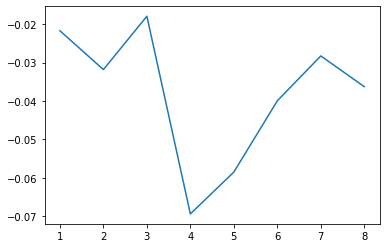

In [340]:
import matplotlib.pyplot as plt

x = np.linspace(1,8,8)

plt.plot(x,np.squeeze(zexps))